In [1]:
# importing necessary libraries
import pandas as pd
import datetime 
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/My Drive/predict-forclosure-probability/Foreclosure-Prediction-Dataset/LMS_31JAN2019.xlsx'

 Importing the LMS Transaction file which captures the information about the details of loan repayment of each customer represented by the unique customer Id under a loan agreement id which is unique to a particular customer, who can have multiple loan in turn. The file has loan repayment history of the individual loans which range from several months to over a span of few years. 

In [ ]:
df = pd.read_excel(path)

In [ ]:
# checking the shape of the tabular data
df.shape

(624250, 38)

In [ ]:
# checking the unique no. of loan ids and customers
print(df.AGREEMENTID.nunique())
print(df.CUSTOMERID.nunique())

33354
32895


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624250 entries, 0 to 624249
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   AGREEMENTID            624250 non-null  int64         
 1   CUSTOMERID             623734 non-null  float64       
 2   LOAN_AMT               624250 non-null  float64       
 3   NET_DISBURSED_AMT      624250 non-null  float64       
 4   INTEREST_START_DATE    624250 non-null  datetime64[ns]
 5   CURRENT_ROI            624250 non-null  float64       
 6   ORIGNAL_ROI            624250 non-null  float64       
 7   CURRENT_TENOR          624245 non-null  float64       
 8   ORIGNAL_TENOR          624250 non-null  int64         
 9   DUEDAY                 624250 non-null  int64         
 10  AUTHORIZATIONDATE      624250 non-null  datetime64[ns]
 11  CITY                   624242 non-null  object        
 12  PRE_EMI_DUEAMT         624250 non-null  floa

It is observed few of the columns in the dataframe have missing values namely Customer ID, City,Current tenor,Last Receipt Date & Amount,Balance tenure etc.

In [ ]:
# Taking a look at the first 10 rows of the dataframe
df.head(10)

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,1.171011e+07,1.171011e+07,2010-08-30,13.734072,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.516699e+06,7.332154e+06,184544.396568,29042.458800,29042.458800,0.00000,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,2013-11-01,83559.0,40.06,39,19.0,0.0,0.6000,HL,10901100.0,NaN,NaN,39
1,11220002,12001001.0,1.929025e+07,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,1,2010-09-15,MUMBAI,100504.575864,100504.575864,0.0,1.061903e+07,1.033958e+07,279448.084560,0.000000,0.000000,0.00000,279448.084560,1.234760e+07,6.942656e+06,4.945154e+06,1.713861e+07,2013-11-01,126530.0,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,4.053499e+06,4.053499e+06,2010-09-06,17.167590,12.485520,360.0,180,5,2010-09-06,MUMBAI,0.000000,0.000000,0.0,2.439242e+06,2.439242e+06,0.000000,0.441710,0.000000,0.44171,-0.441710,3.944954e+06,1.085444e+05,1.549566e+06,3.944954e+06,2013-11-05,30898.0,79.34,38,322.0,0.0,0.9100,HL,10901101.0,NaN,NaN,38
3,11220004,12001003.0,1.325703e+07,1.325703e+07,2010-09-29,15.606900,10.924830,198.0,180,5,2010-09-29,MUMBAI,28441.732656,28441.732656,0.0,7.211965e+06,7.211965e+06,0.000000,0.000000,0.000000,0.00000,0.000000,1.030278e+07,2.954253e+06,4.219464e+06,1.255472e+07,2013-11-05,88256.0,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN,38
4,11220005,12001004.0,1.321140e+07,1.321140e+07,2010-09-06,16.543314,11.861244,142.0,180,5,2010-09-06,MUMBAI,0.000000,0.000000,0.0,7.712034e+06,7.712034e+06,0.000000,0.000000,0.000000,0.00000,0.000000,8.479158e+06,4.732245e+06,3.812974e+06,1.178201e+07,2013-11-05,91892.0,40.93,38,104.0,0.0,0.7300,HL,10901101.0,NaN,NaN,38
5,11220006,12001005.0,3.933395e+06,3.933395e+06,2010-11-01,16.231176,11.549106,359.0,180,5,2010-11-02,MUMBAI,5947.630536,5947.630536,0.0,2.147360e+06,2.147360e+06,0.000000,0.000000,0.000000,0.00000,0.000000,3.830337e+06,1.030583e+05,1.360684e+06,3.830337e+06,2013-11-05,28518.0,50.89,36,323.0,0.0,0.7200,HL,10901101.0,NaN,NaN,36
6,11220007,12001006.0,6.155313e+06,6.155313e+06,2010-10-11,16.543314,12.485520,262.0,180,5,2010-10-11,MUMBAI,451447.905768,451447.905768,0.0,2.921729e+06,2.921729e+06,0.000000,6133.148904,6133.148904,0.00000,0.000000,5.929700e+06,2.256132e+05,2.067353e+06,5.929700e+06,2013-11-05,47247.0,45.32,28,234.0,0.0,1.2300,HL,10901101.0,NaN,NaN,37
7,11220008,12001007.0,1.002259e+07,1.002259e+07,2010-10-06,13.734072,10.612692,194.0,180,1,2010-10-06,THANE,60322.180776,60322.180776,0.0,5.372119e+06,5.226927e+06,145192.417032,0.000000,0.000000,0.00000,145192.417032,8.211513e+06,1.811075e+06,2.984047e+06,9.412549e+06,2013-11-01,65741.0,84.63,37,157.0,0.0,0.6000,HL,10901100.0,NaN,NaN,37
8,11220009,12001008.0,9.499284e+06,9.499284e+06,2010-11-10,18.915563,13.609217,287.0,180,5,2010-11-05,MUMBAI,188502.121752,188502.121752,0.0,5.810343e+06,5.795245e+06,15097.661472,171229.036560,171229.036560,0.00000,15097.661472,9.228138e+06,2.711462e+05,3.796394e+06,9.228138e+06,2013-11-05,77530.0,52.34,34,253.0,25.0,0.6100,LAP,10901109.0,NaN,NaN,36
9,11220010,12001009.0,7.755937e+06,7.755937e+06,2010-10-26,15.606900,10.924830,341.0,180,5,2010-10-26,MUMBAI,27732.787464,27732.787464,0.0,4.117673e+06,4.117673e+06,0.000000,0.000000,0.000000,0.00000,0.000000,7.511708e+06,2.442289e+05,2.573672e+06,7.511708e+06,2013-11-05,54433.0,30.94,36,305.0,0.0,0.8300,HL,10901101.0,NaN,NaN,37


In [ ]:
# Obtaining the transaction details about a particular loan by making use of the 'AGREEMENT ID' feature.
df[df['AGREEMENTID']==11220003]

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
2,11220003,12001002.0,4053498.66,4053498.66,2010-09-06,17.167590,12.48552,360.0,180,5,2010-09-06,MUMBAI,0.0,0.0,0.0,2.439242e+06,2.439242e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.944954e+06,108544.376936,1.549566e+06,3.944954e+06,2013-11-05,30898.00,79.34,38,322.0,0.0,0.91,HL,10901101.0,NaN,NaN,38
2856,11220003,12001002.0,4053498.66,4053498.66,2010-09-06,17.167590,12.48552,360.0,180,5,2010-09-06,MUMBAI,0.0,0.0,0.0,2.507482e+06,2.507482e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.943770e+06,109728.809245,1.594769e+06,3.943770e+06,2013-12-06,116.06,79.34,39,321.0,0.0,0.91,HL,10901101.0,NaN,NaN,39
5826,11220003,12001002.0,4053498.66,4053498.66,2010-09-06,17.167590,12.48552,360.0,180,5,2010-09-06,MUMBAI,0.0,0.0,0.0,2.575722e+06,2.575722e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.942572e+06,110926.813267,1.639958e+06,3.942572e+06,2014-01-05,30898.00,79.34,40,320.0,0.0,0.91,HL,10901101.0,NaN,NaN,40
8929,11220003,12001002.0,4053498.66,4053498.66,2010-09-06,17.167590,12.48552,360.0,180,5,1970-09-07,MUMBAI,0.0,0.0,0.0,2.643961e+06,2.643961e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.941360e+06,112138.554146,1.685133e+06,3.941360e+06,1974-02-06,30898.00,79.34,41,319.0,0.0,0.91,HL,10901101.0,NaN,NaN,41
12194,11220003,12001002.0,4053498.66,4053498.66,2010-09-06,17.167590,12.48552,360.0,180,5,2010-09-06,MUMBAI,0.0,0.0,0.0,2.712201e+06,2.712201e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.940134e+06,113364.166998,1.730295e+06,3.940134e+06,2014-03-05,30898.00,79.34,42,318.0,0.0,0.91,HL,10901101.0,NaN,NaN,42
15535,11220003,12001002.0,4053498.66,4053498.66,2010-09-06,17.167590,12.48552,360.0,180,5,2010-09-06,MUMBAI,0.0,0.0,0.0,2.780441e+06,2.780441e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.938895e+06,114603.831979,1.775442e+06,3.938895e+06,2014-04-05,30898.00,79.34,43,317.0,0.0,0.91,HL,10901101.0,NaN,NaN,43
18932,11220003,12001002.0,4053498.66,4053498.66,2010-09-06,17.167590,12.48552,360.0,180,5,2010-09-06,MUMBAI,0.0,0.0,0.0,2.848681e+06,2.848681e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.937641e+06,115857.699218,1.820575e+06,3.937641e+06,2014-05-05,30898.00,79.34,44,316.0,0.0,0.91,HL,10901101.0,NaN,NaN,44
22615,11220003,12001002.0,4053498.66,4053498.66,2010-09-06,17.167590,12.48552,360.0,180,5,2010-09-06,MUMBAI,0.0,0.0,0.0,2.916921e+06,2.916921e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.936373e+06,117125.933858,1.865694e+06,3.936373e+06,2014-06-05,30898.00,79.34,45,315.0,0.0,0.91,HL,10901101.0,NaN,NaN,45
26489,11220003,12001002.0,4053498.66,4053498.66,2010-09-06,17.167590,12.48552,360.0,180,5,2010-09-06,MUMBAI,0.0,0.0,0.0,2.985161e+06,2.985161e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.935091e+06,118408.040472,1.910799e+06,3.935091e+06,2014-07-05,30898.00,79.34,46,314.0,0.0,0.91,HL,10901101.0,NaN,NaN,46
30374,11220003,12001002.0,4053498.66,4053498.66,2010-09-06,17.167590,12.48552,360.0,180,5,2010-09-06,MUMBAI,0.0,0.0,0.0,3.053400e+06,3.053400e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.933793e+06,119705.160043,1.955889e+06,3.933793e+06,2014-08-05,30898.00,79.34,47,313.0,0.0,0.91,HL,10901101.0,NaN,NaN,47


It is observed that in the LMS file, the particular loan id of '11220003' has transactional details about the loan repayment that spans nearly 4 years. At first glance, it is observed that the last receipt date feature has a data entry error, where the correct entry for the date should have been '2014' but it is '74', which forces pandas to interpret the date being from '1974'.

In [ ]:
# checking how pandas has interpretted and stored the date column
date = df.LAST_RECEIPT_DATE
print(date[0].month)
print(str(date[0]))

11
2013-11-01 00:00:00


In [ ]:
# checking all the unique years in the date column
date.map(lambda t: t.date().year).unique()

array([2013., 2012.,   nan, 2014., 1974., 1973., 1972., 2015., 2016.,
       2017., 2018., 2019.])

In [ ]:
# Extracting just the year part from all the dates in dataframe by making use of datetime module
date.dt.year 

0         2013.0
1         2013.0
2         2013.0
3         2013.0
4         2013.0
           ...  
624245       NaN
624246    2015.0
624247       NaN
624248    2015.0
624249       NaN
Name: LAST_RECEIPT_DATE, Length: 624250, dtype: float64

In [ ]:
# checking the indexes at which there is a data entry with value as '1973'
date[date.dt.year==1973].index

Int64Index([ 8990,  9116,  9117,  9190,  9428,  9597,  9632,  9779,  9891,
             9897,  9899,  9905,  9928,  9966,  9967,  9994,  9995, 10038,
            10052, 10065, 10066, 10292, 10510, 10518, 10622, 10865, 10886,
            11028, 11065, 11242, 11568, 11569, 11597, 11681, 11682, 11691,
            11730, 11736, 11747, 11782, 11822, 11847, 11862, 11876],
           dtype='int64')

In [ ]:
# Making the correction in data entry
date.update(date[date.dt.year==1973].map(lambda t:t.replace(year=2013)))
date

0        2013-11-01
1        2013-11-01
2        2013-11-05
3        2013-11-05
4        2013-11-05
            ...    
624245          NaT
624246   2015-08-31
624247          NaT
624248   2015-08-31
624249          NaT
Name: LAST_RECEIPT_DATE, Length: 624250, dtype: datetime64[ns]

In [ ]:
# checking if the change is reflected in the entire dataframe
date.map(lambda t: t.date().year).unique()

array([2013., 2012.,   nan, 2014., 1974., 1972., 2015., 2016., 2017.,
       2018., 2019.])

In [ ]:
# Making the same correction for the years '1972' and '1974'
dt_72=date[date.dt.year==1972].map(lambda t:t.replace(year=2012))
dt_74=date[date.dt.year==1974].map(lambda t:t.replace(year=2014))

In [ ]:
date.update(dt_72)
date.update(dt_74)
date

0        2013-11-01
1        2013-11-01
2        2013-11-05
3        2013-11-05
4        2013-11-05
            ...    
624245          NaT
624246   2015-08-31
624247          NaT
624248   2015-08-31
624249          NaT
Name: LAST_RECEIPT_DATE, Length: 624250, dtype: datetime64[ns]

In [ ]:
# Checking the date column after making all necessary corrections
date.map(lambda t: t.date().year).unique()

array([2013., 2012.,   nan, 2014., 2015., 2016., 2017., 2018., 2019.])

In [ ]:
# replacing the corrected dates in the original feature
df.LAST_RECEIPT_DATE = date

In [ ]:
df.LAST_RECEIPT_DATE.map(lambda t: t.date().year).unique()

array([2013., 2012.,   nan, 2014., 2015., 2016., 2017., 2018., 2019.])

In [ ]:
df.columns

Index(['AGREEMENTID', 'CUSTOMERID', 'LOAN_AMT', 'NET_DISBURSED_AMT',
       'INTEREST_START_DATE', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'AUTHORIZATIONDATE', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT',
       'SCHEMEID', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB'],
      dtype='object')

In [ ]:
df.drop(labels=['LOAN_AMT','MOB'],axis=1,inplace=True)

Dropping the column 'LOAN_AMT' from the dataframe which is same as the 'NET_DISBURSED_AMT' and the column 'MOB' is also dropped because of its insignificance.  

In [ ]:
# Checking for data consistency in the interest start date column as the last receipt date 
df.INTEREST_START_DATE.map(lambda t: t.date().year).unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
# Checking for data consistency in the authorization date column as the last receipt date
df.AUTHORIZATIONDATE.map(lambda t: t.date().year).unique()

array([2010, 2011, 2012, 2013, 2014, 1970, 1971, 1972, 1973, 1974, 2015,
       2016, 2017, 2018])

 As it apparent, there is data entry error in the authorization date column of the dataframe.It can also be noticed that the interest start date captures the required information regarding when a particular loan was started.The dates on the two columns are either of the same date or they are a day apart, so it is decided that authorization date column would be dropped. The column 'DUEDAY',which represents the no. of days in which the next installment is due, is dropped too because of its relative insignificance at solving the problem of predicting loan foreclosure.

In [ ]:
df.drop(labels=['AUTHORIZATIONDATE','DUEDAY'],axis=1,inplace=True)

## **Customer details dataframe**

In [3]:
path1 = '/content/gdrive/My Drive/predict-forclosure-probability/Foreclosure-Prediction-Dataset/Customers_31JAN2019.xlsx'
df1 = pd.read_excel(path1)

The 'customers_31JAN2019' file contains personal details of each of the customers that have taken up a loan.

In [4]:
df1.shape

(10000, 15)

In [5]:
!pip install missingno

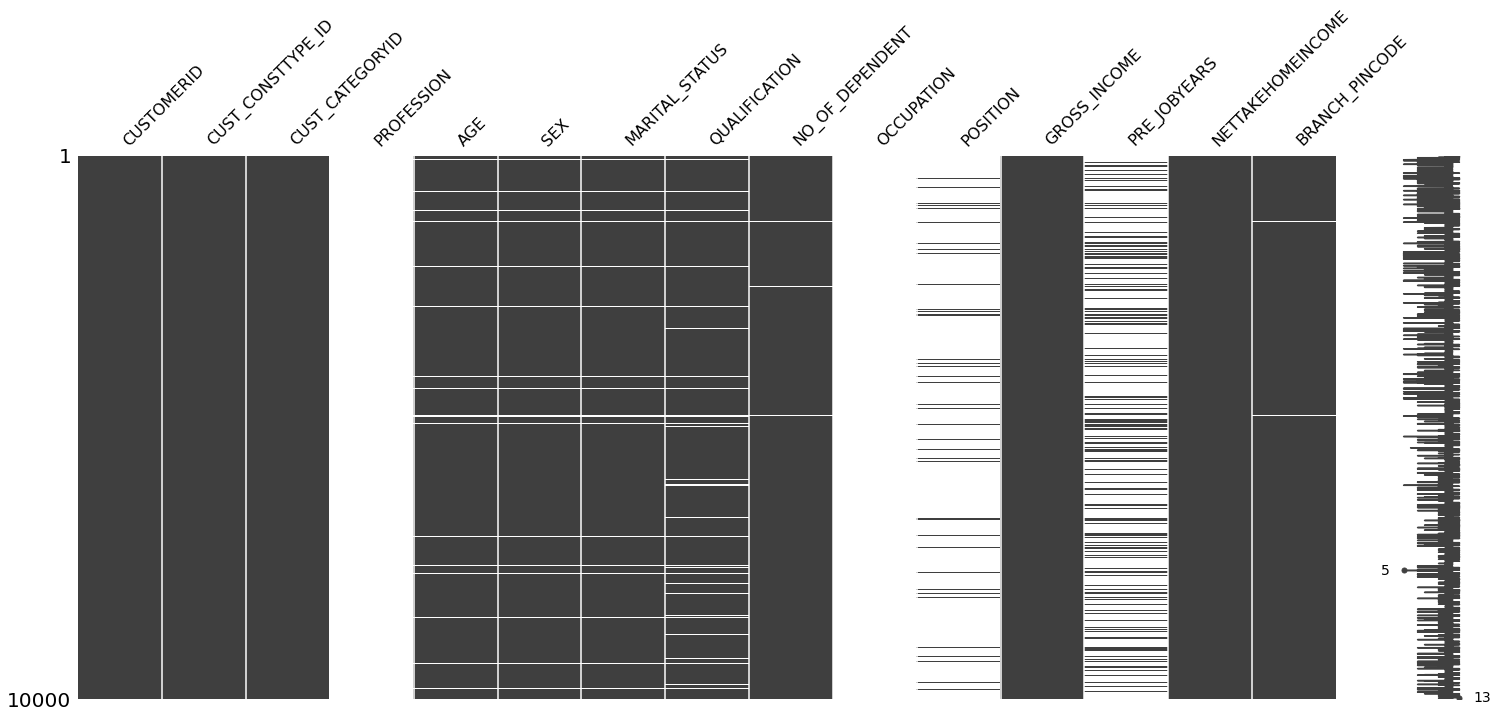

In [6]:
import missingno as msno
%matplotlib inline
msno.matrix(df1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUSTOMERID         10000 non-null  int64  
 1   CUST_CONSTTYPE_ID  10000 non-null  int64  
 2   CUST_CATEGORYID    10000 non-null  int64  
 3   PROFESSION         0 non-null      float64
 4   AGE                9604 non-null   float64
 5   SEX                9606 non-null   object 
 6   MARITAL_STATUS     9604 non-null   object 
 7   QUALIFICATION      9397 non-null   object 
 8   NO_OF_DEPENDENT    9921 non-null   float64
 9   OCCUPATION         0 non-null      float64
 10  POSITION           661 non-null    object 
 11  GROSS_INCOME       10000 non-null  float64
 12  PRE_JOBYEARS       2375 non-null   float64
 13  NETTAKEHOMEINCOME  10000 non-null  float64
 14  BRANCH_PINCODE     9927 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 1.1+ MB


In [ ]:
# checking the no of unique customers 
df1.CUSTOMERID.nunique()

10000

It is to be noted that there is personal information about only 10,000 customers when the LMS transaction has loan details about 32895 odd no of customers.

In [ ]:
# dropping profession and occupation columns from the dataframe as no info is available for these 2 features
df1.drop(['PROFESSION','OCCUPATION'],axis=1,inplace=True)

In [ ]:
# dropping the position and pre job years features from the dataframe as more than 75% values are missing in the 2 features respectively
df1.drop(['POSITION','PRE_JOBYEARS'],axis=1,inplace=True)

In [ ]:
# dropping the branch pincode feature because of its insignificance as a feature
df1.drop('BRANCH_PINCODE',axis=1,inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUSTOMERID         10000 non-null  int64  
 1   CUST_CONSTTYPE_ID  10000 non-null  int64  
 2   CUST_CATEGORYID    10000 non-null  int64  
 3   AGE                9604 non-null   float64
 4   SEX                9606 non-null   object 
 5   MARITAL_STATUS     9604 non-null   object 
 6   QUALIFICATION      9397 non-null   object 
 7   NO_OF_DEPENDENT    9921 non-null   float64
 8   GROSS_INCOME       10000 non-null  float64
 9   NETTAKEHOMEINCOME  10000 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 781.4+ KB


In [ ]:
df1.head(10)

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,GROSS_INCOME,NETTAKEHOMEINCOME
0,12001000,1,5,33.0,M,M,POSTGRAD,0.0,198375.221829,198375.221829
1,12001001,1,5,44.0,M,M,POSTGRAD,0.0,242703.982915,242703.982915
2,12001002,1,7,50.0,M,M,GRAD,0.0,0.000000,0.000000
3,12001003,3,4,40.0,M,M,GRAD,0.0,365263.511624,365263.516128
4,12001004,3,4,27.0,M,M,GRAD,0.0,187342.198995,187342.198995
5,12001005,3,4,43.0,M,M,GRAD,0.0,53536.208228,53536.208228
6,12001006,3,4,48.0,M,M,UG,0.0,49842.149808,49842.145305
7,12001007,1,5,33.0,M,M,POSTGRAD,0.0,123370.483661,123370.483661
8,12001008,1,4,44.0,M,M,GRAD,0.0,183331.982693,183331.987196
9,12001009,3,4,37.0,M,M,UG,0.0,93803.844072,93803.839568


In [ ]:
# dropping the feature gross income because the net take home income is more important and the both represent the same info
df1.drop('GROSS_INCOME',axis=1,inplace=True)

In [ ]:
print(df1.CUST_CATEGORYID.unique())
print(df1.CUST_CONSTTYPE_ID.unique())

[5 7 4 6 8]
[1 3 4 2 6 5]


In [ ]:
# dropping 'CUST_CATEGORYID' and making use of 'CUST_CONSTTYPE_ID'
# 'CUST_CONSTTYPE_ID' categorizes customers in numerically encoded 6 types
df1.drop('CUST_CATEGORYID',axis=1,inplace=True)

In [ ]:
# looking at the unique values of each of the following features
print(df1.SEX.unique())
print(df1.MARITAL_STATUS.unique())
print(df1.QUALIFICATION.unique())
print(df1.NO_OF_DEPENDENT.unique())

['M' 'F' nan]
['M' 'S' nan]
['POSTGRAD' 'GRAD' 'UG' nan 'OTHERS' 'PRF' 'DOCTRATE' 'ENG' 'MAT']
[ 0.  2. nan  1.  3.  4. 10.  5.  6.  9.]


In [ ]:
df1.describe(include='all')

,CUSTOMERID,CUST_CONSTTYPE_ID,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,NETTAKEHOMEINCOME
count,1.000000e+04,10000.000000,9604.000000,9606,9604,9397,9921.000000,1.000000e+04
unique,NaN,NaN,NaN,2,2,8,NaN,NaN
top,NaN,NaN,NaN,M,M,UG,NaN,NaN
freq,NaN,NaN,NaN,8418,8798,4506,NaN,NaN
mean,1.200778e+07,1.103600,40.844648,NaN,NaN,NaN,0.519202,1.536376e+05
std,3.842990e+03,0.526018,9.344151,NaN,NaN,NaN,1.097127,5.797531e+05
min,1.200100e+07,1.000000,18.000000,NaN,NaN,NaN,0.000000,0.000000e+00
25%,1.200464e+07,1.000000,34.000000,NaN,NaN,NaN,0.000000,4.503887e+04
50%,1.200787e+07,1.000000,40.000000,NaN,NaN,NaN,0.000000,7.506479e+04
75%,1.201094e+07,1.000000,48.000000,NaN,NaN,NaN,0.000000,1.285860e+05


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUSTOMERID         10000 non-null  int64  
 1   CUST_CONSTTYPE_ID  10000 non-null  int64  
 2   AGE                9604 non-null   float64
 3   SEX                9606 non-null   object 
 4   MARITAL_STATUS     9604 non-null   object 
 5   QUALIFICATION      9397 non-null   object 
 6   NO_OF_DEPENDENT    9921 non-null   float64
 7   NETTAKEHOMEINCOME  10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


Now, the missing values in the respective features are imputed by making use of central tendencies, namely mode and median depending on the feature.

In [ ]:
# replacing the missing values in no of dependents with median value of 0
df1.NO_OF_DEPENDENT.replace(np.nan,0,inplace=True)

In [ ]:
# replacing the missing values in qualification with mode value of 'UG'
df1.QUALIFICATION.replace(np.nan,'UG',inplace=True)

In [ ]:
# replacing the missing values in AGE with mean value of the feature
df1.AGE.replace(np.nan,df1.AGE.mean(),inplace=True)

In [ ]:
# replacing the missing values in SEX and Marital Status with mode values of the respective features
df1.SEX.replace(np.nan,'M',inplace=True)
df1.MARITAL_STATUS.replace(np.nan,'M',inplace=True)

In [ ]:
# replacing the missing values in net take home income with median value of the feature
df1.NETTAKEHOMEINCOME.replace(0.0,df1.NETTAKEHOMEINCOME.median(),inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUSTOMERID         10000 non-null  int64  
 1   CUST_CONSTTYPE_ID  10000 non-null  int64  
 2   AGE                10000 non-null  float64
 3   SEX                10000 non-null  object 
 4   MARITAL_STATUS     10000 non-null  object 
 5   QUALIFICATION      10000 non-null  object 
 6   NO_OF_DEPENDENT    10000 non-null  float64
 7   NETTAKEHOMEINCOME  10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


## **Combining training data**

In [ ]:
p = '/content/gdrive/My Drive/predict-forclosure-probability/Foreclosure-Prediction-Dataset/train_foreclosure.csv'
tf_df = pd.read_csv(p ,header=0)

Importing the train foreclorsure file that contains the individual agreement ids along with the target variable showing which particular ids have foreclosed




In [ ]:
tf_df.head(10)

,AGREEMENTID,FORECLOSURE
0,11220001,1
1,11220002,1
2,11220006,1
3,11220008,1
4,11220010,1
5,11220011,0
6,11220012,0
7,11220014,1
8,11220016,1
9,11220017,0


In [ ]:
tf_df.shape

(20012, 2)

In [ ]:
tf_df.AGREEMENTID.nunique()

20012

In [ ]:
# merging the train foreclosure dataframe with the LMS_transaction dataframe,to extract loan repayment details
# of the agreement ids mentioned in the train foreclosure file, in attempt to gather the training data.
t = pd.merge(df,tf_df,on='AGREEMENTID')
t.head(15)

,AGREEMENTID,CUSTOMERID,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,FORECLOSURE
0,11220001,12001000.0,1.171011e+07,2010-08-30,13.734072,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,7.516699e+06,7.332154e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,2013-11-01,83559.0,40.06,39,19.0,0.0,0.60,HL,10901100.0,NaN,NaN,1
1,11220001,12001000.0,1.171011e+07,2010-08-30,13.734072,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,7.701243e+06,7.516699e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.157467e+06,9.552641e+06,2.638213e+06,9.233299e+06,2013-12-01,83559.0,40.06,40,18.0,0.0,0.60,HL,10901100.0,NaN,NaN,1
2,11220001,12001000.0,1.171011e+07,2010-08-30,13.421934,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.701243e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.051797e+06,9.658311e+06,2.657989e+06,9.127629e+06,2014-01-01,83559.0,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,1
3,11220001,12001000.0,1.171011e+07,2010-08-30,13.421934,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.885787e+06,0.000000,29042.458800,29042.458800,0.0,0.000000,1.944731e+06,9.765377e+06,2.676370e+06,9.020563e+06,2014-02-02,83559.0,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,1
4,11220001,12001000.0,1.171011e+07,2010-08-30,13.421934,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,8.254876e+06,8.070332e+06,184544.396568,213586.855368,213586.855368,0.0,184544.396568,1.836705e+06,9.873402e+06,2.693792e+06,8.912538e+06,2014-03-01,83559.0,40.06,43,15.0,0.0,0.60,HL,10901100.0,NaN,NaN,1
5,11220001,12001000.0,1.171011e+07,2010-08-30,13.421934,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,8.439420e+06,8.254876e+06,184544.396568,213586.855368,213586.855368,0.0,184544.396568,1.727712e+06,9.982395e+06,2.710245e+06,8.803545e+06,2014-04-01,83559.0,40.06,44,14.0,0.0,0.60,HL,10901100.0,NaN,NaN,1
6,11220001,12001000.0,1.171011e+07,2010-08-30,13.421934,10.612692,45.0,120,MUMBAI,7994.273589,7994.273589,0.0,8.614898e+06,8.439420e+06,175477.782641,213586.855368,213586.855368,0.0,175477.782641,1.164472e+05,1.159366e+07,2.725723e+06,8.693575e+06,2014-05-05,1000000.0,40.06,45,0.0,0.0,0.60,HL,10901100.0,NaN,NaN,1
7,11220002,12001001.0,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,MUMBAI,100504.575864,100504.575864,0.0,1.061903e+07,1.033958e+07,279448.084560,0.000000,0.000000,0.0,279448.084560,1.234760e+07,6.942656e+06,4.945154e+06,1.713861e+07,2013-11-01,126530.0,84.31,38,99.0,0.0,0.60,HL,10901100.0,NaN,NaN,1
8,11220006,12001005.0,3.933395e+06,2010-11-01,16.231176,11.549106,359.0,180,MUMBAI,5947.630536,5947.630536,0.0,2.147360e+06,2.147360e+06,0.000000,0.000000,0.000000,0.0,0.000000,3.830337e+06,1.030583e+05,1.360684e+06,3.830337e+06,2013-11-05,28518.0,50.89,36,323.0,0.0,0.72,HL,10901101.0,NaN,NaN,1
9,11220006,12001005.0,3.933395e+06,2010-11-01,16.231176,11.549106,359.0,180,MUMBAI,5947.630536,5947.630536,0.0,2.210343e+06,2.210343e+06,0.000000,0.000000,0.000000,0.0,0.000000,3.829018e+06,1.043769e+05,1.402179e+06,3.829018e+06,2013-12-05,28518.0,50.89,37,322.0,0.0,0.72,HL,10901101.0,NaN,NaN,1


In [ ]:
# checking if the two were merged correctly, without any loss of information
t.AGREEMENTID.nunique()

20012

In [ ]:
# merging the customer detail dataframe with the new merged table to insert info about the individual customers
train_data = pd.merge(t,df1,on='CUSTOMERID',how='left')
train_data.head(15)

,AGREEMENTID,CUSTOMERID,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,FORECLOSURE,CUST_CONSTTYPE_ID,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,NETTAKEHOMEINCOME
0,11220001,12001000.0,1.171011e+07,2010-08-30,13.734072,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,7.516699e+06,7.332154e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,2013-11-01,83559.0,40.06,39,19.0,0.0,0.60,HL,10901100.0,NaN,NaN,1,1.0,33.0,M,M,POSTGRAD,0.0,198375.221829
1,11220001,12001000.0,1.171011e+07,2010-08-30,13.734072,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,7.701243e+06,7.516699e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.157467e+06,9.552641e+06,2.638213e+06,9.233299e+06,2013-12-01,83559.0,40.06,40,18.0,0.0,0.60,HL,10901100.0,NaN,NaN,1,1.0,33.0,M,M,POSTGRAD,0.0,198375.221829
2,11220001,12001000.0,1.171011e+07,2010-08-30,13.421934,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.701243e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.051797e+06,9.658311e+06,2.657989e+06,9.127629e+06,2014-01-01,83559.0,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,1,1.0,33.0,M,M,POSTGRAD,0.0,198375.221829
3,11220001,12001000.0,1.171011e+07,2010-08-30,13.421934,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.885787e+06,0.000000,29042.458800,29042.458800,0.0,0.000000,1.944731e+06,9.765377e+06,2.676370e+06,9.020563e+06,2014-02-02,83559.0,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,1,1.0,33.0,M,M,POSTGRAD,0.0,198375.221829
4,11220001,12001000.0,1.171011e+07,2010-08-30,13.421934,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,8.254876e+06,8.070332e+06,184544.396568,213586.855368,213586.855368,0.0,184544.396568,1.836705e+06,9.873402e+06,2.693792e+06,8.912538e+06,2014-03-01,83559.0,40.06,43,15.0,0.0,0.60,HL,10901100.0,NaN,NaN,1,1.0,33.0,M,M,POSTGRAD,0.0,198375.221829
5,11220001,12001000.0,1.171011e+07,2010-08-30,13.421934,10.612692,58.0,120,MUMBAI,7994.273589,7994.273589,0.0,8.439420e+06,8.254876e+06,184544.396568,213586.855368,213586.855368,0.0,184544.396568,1.727712e+06,9.982395e+06,2.710245e+06,8.803545e+06,2014-04-01,83559.0,40.06,44,14.0,0.0,0.60,HL,10901100.0,NaN,NaN,1,1.0,33.0,M,M,POSTGRAD,0.0,198375.221829
6,11220001,12001000.0,1.171011e+07,2010-08-30,13.421934,10.612692,45.0,120,MUMBAI,7994.273589,7994.273589,0.0,8.614898e+06,8.439420e+06,175477.782641,213586.855368,213586.855368,0.0,175477.782641,1.164472e+05,1.159366e+07,2.725723e+06,8.693575e+06,2014-05-05,1000000.0,40.06,45,0.0,0.0,0.60,HL,10901100.0,NaN,NaN,1,1.0,33.0,M,M,POSTGRAD,0.0,198375.221829
7,11220002,12001001.0,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,MUMBAI,100504.575864,100504.575864,0.0,1.061903e+07,1.033958e+07,279448.084560,0.000000,0.000000,0.0,279448.084560,1.234760e+07,6.942656e+06,4.945154e+06,1.713861e+07,2013-11-01,126530.0,84.31,38,99.0,0.0,0.60,HL,10901100.0,NaN,NaN,1,1.0,44.0,M,M,POSTGRAD,0.0,242703.982915
8,11220006,12001005.0,3.933395e+06,2010-11-01,16.231176,11.549106,359.0,180,MUMBAI,5947.630536,5947.630536,0.0,2.147360e+06,2.147360e+06,0.000000,0.000000,0.000000,0.0,0.000000,3.830337e+06,1.030583e+05,1.360684e+06,3.830337e+06,2013-11-05,28518.0,50.89,36,323.0,0.0,0.72,HL,10901101.0,NaN,NaN,1,3.0,43.0,M,M,GRAD,0.0,53536.208228
9,11220006,12001005.0,3.933395e+06,2010-11-01,16.231176,11.549106,359.0,180,MUMBAI,5947.630536,5947.630536,0.0,2.210343e+06,2.210343e+06,0.000000,0.000000,0.000000,0.0,0.000000,3.829018e+06,1.043769e+05,1.402179e+06,3.829018e+06,2013-12-05,28518.0,50.89,37,322.0,0.0,0

In [ ]:
# checking whether the final table was correctly formed or not
train_data.AGREEMENTID.nunique()

20012

In [ ]:
# the no. of unique customers in the training data
train_data.CUSTOMERID.nunique()

19731

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374585 entries, 0 to 374584
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   AGREEMENTID            374585 non-null  int64         
 1   CUSTOMERID             374272 non-null  float64       
 2   NET_DISBURSED_AMT      374585 non-null  float64       
 3   INTEREST_START_DATE    374585 non-null  datetime64[ns]
 4   CURRENT_ROI            374585 non-null  float64       
 5   ORIGNAL_ROI            374585 non-null  float64       
 6   CURRENT_TENOR          374582 non-null  float64       
 7   ORIGNAL_TENOR          374585 non-null  int64         
 8   CITY                   374577 non-null  object        
 9   PRE_EMI_DUEAMT         374585 non-null  float64       
 10  PRE_EMI_RECEIVED_AMT   374585 non-null  float64       
 11  PRE_EMI_OS_AMOUNT      374585 non-null  float64       
 12  EMI_DUEAMT             374585 non-null  floa

In [ ]:
# train_data.to_excel('merged_traindf.xlsx',float_format='%.2f',index=False)

## **Combining Test Data**

Performing the same set of operations as above to prepare the testing data.

In [ ]:
p1 = '/content/gdrive/My Drive/predict-forclosure-probability/Foreclosure-Prediction-Dataset/test_foreclosure.csv'
ts_df = pd.read_csv(p1 ,header=0)
ts_df.head()

,AGREEMENTID,FORECLOSURE
0,11220003,NaN
1,11220004,NaN
2,11220005,NaN
3,11220007,NaN
4,11220009,NaN


In [ ]:
ts_df.shape

(13342, 2)

In [ ]:
ts_df.AGREEMENTID.nunique()

13342

In [ ]:
ts = pd.merge(df,ts_df,on='AGREEMENTID')
ts.head(10)

,AGREEMENTID,CUSTOMERID,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,FORECLOSURE
0,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.439242e+06,2.439242e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.944954e+06,108544.376936,1.549566e+06,3.944954e+06,2013-11-05,30898.00,79.34,38,322.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN
1,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.507482e+06,2.507482e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.943770e+06,109728.809245,1.594769e+06,3.943770e+06,2013-12-06,116.06,79.34,39,321.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN
2,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.575722e+06,2.575722e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.942572e+06,110926.813267,1.639958e+06,3.942572e+06,2014-01-05,30898.00,79.34,40,320.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN
3,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.643961e+06,2.643961e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.941360e+06,112138.554146,1.685133e+06,3.941360e+06,2014-02-06,30898.00,79.34,41,319.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN
4,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.712201e+06,2.712201e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.940134e+06,113364.166998,1.730295e+06,3.940134e+06,2014-03-05,30898.00,79.34,42,318.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN
5,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.780441e+06,2.780441e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.938895e+06,114603.831979,1.775442e+06,3.938895e+06,2014-04-05,30898.00,79.34,43,317.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN
6,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.848681e+06,2.848681e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.937641e+06,115857.699218,1.820575e+06,3.937641e+06,2014-05-05,30898.00,79.34,44,316.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN
7,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.916921e+06,2.916921e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.936373e+06,117125.933858,1.865694e+06,3.936373e+06,2014-06-05,30898.00,79.34,45,315.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN
8,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.985161e+06,2.985161e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.935091e+06,118408.040472,1.910799e+06,3.935091e+06,2014-07-05,30898.00,79.34,46,314.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN
9,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,3.053400e+06,3.053400e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.933793e+06,119705.160043,1.955889e+06,3.933793e+06,2014-08-05,30898.00,79.34,47,313.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN


In [ ]:
ts.AGREEMENTID.nunique()

13342

In [ ]:
test_data = pd.merge(ts,df1,on='CUSTOMERID',how='left')
test_data.head(10)

,AGREEMENTID,CUSTOMERID,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,FORECLOSURE,CUST_CONSTTYPE_ID,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,NETTAKEHOMEINCOME
0,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.439242e+06,2.439242e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.944954e+06,108544.376936,1.549566e+06,3.944954e+06,2013-11-05,30898.00,79.34,38,322.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN,1.0,50.0,M,M,GRAD,0.0,75064.79
1,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.507482e+06,2.507482e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.943770e+06,109728.809245,1.594769e+06,3.943770e+06,2013-12-06,116.06,79.34,39,321.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN,1.0,50.0,M,M,GRAD,0.0,75064.79
2,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.575722e+06,2.575722e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.942572e+06,110926.813267,1.639958e+06,3.942572e+06,2014-01-05,30898.00,79.34,40,320.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN,1.0,50.0,M,M,GRAD,0.0,75064.79
3,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.643961e+06,2.643961e+06,0.0,0.441710,0.000000,0.44171,-0.44171,3.941360e+06,112138.554146,1.685133e+06,3.941360e+06,2014-02-06,30898.00,79.34,41,319.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN,1.0,50.0,M,M,GRAD,0.0,75064.79
4,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.712201e+06,2.712201e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.940134e+06,113364.166998,1.730295e+06,3.940134e+06,2014-03-05,30898.00,79.34,42,318.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN,1.0,50.0,M,M,GRAD,0.0,75064.79
5,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.780441e+06,2.780441e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.938895e+06,114603.831979,1.775442e+06,3.938895e+06,2014-04-05,30898.00,79.34,43,317.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN,1.0,50.0,M,M,GRAD,0.0,75064.79
6,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.848681e+06,2.848681e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.937641e+06,115857.699218,1.820575e+06,3.937641e+06,2014-05-05,30898.00,79.34,44,316.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN,1.0,50.0,M,M,GRAD,0.0,75064.79
7,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.916921e+06,2.916921e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.936373e+06,117125.933858,1.865694e+06,3.936373e+06,2014-06-05,30898.00,79.34,45,315.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN,1.0,50.0,M,M,GRAD,0.0,75064.79
8,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,2.985161e+06,2.985161e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.935091e+06,118408.040472,1.910799e+06,3.935091e+06,2014-07-05,30898.00,79.34,46,314.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN,1.0,50.0,M,M,GRAD,0.0,75064.79
9,11220003,12001002.0,4053498.66,2010-09-06,17.16759,12.48552,360.0,180,MUMBAI,0.0,0.0,0.0,3.053400e+06,3.053400e+06,0.0,68240.281406,68239.839696,0.44171,-0.44171,3.933793e+06,119705.160043,1.955889e+06,3.933793e+06,2014-08-05,30898.00,79.34,47,313.0,0.0,0.91,HL,10901101.0,NaN,NaN,NaN,1.0,50.0,M,M,GRAD,0.0,75064.79


In [ ]:
print(test_data.AGREEMENTID.nunique())
print(test_data.CUSTOMERID.nunique())

13342
13164


In [ ]:
# checking if all the data from LMS file was segregated completely into training and test data
# The no.s represent the unique agreement ids in test and training data
13342 + 20012 

33354

The no.s do add upto 33354 as found in the LMS transaction file

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249665 entries, 0 to 249664
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   AGREEMENTID            249665 non-null  int64         
 1   CUSTOMERID             249462 non-null  float64       
 2   NET_DISBURSED_AMT      249665 non-null  float64       
 3   INTEREST_START_DATE    249665 non-null  datetime64[ns]
 4   CURRENT_ROI            249665 non-null  float64       
 5   ORIGNAL_ROI            249665 non-null  float64       
 6   CURRENT_TENOR          249663 non-null  float64       
 7   ORIGNAL_TENOR          249665 non-null  int64         
 8   CITY                   249665 non-null  object        
 9   PRE_EMI_DUEAMT         249665 non-null  float64       
 10  PRE_EMI_RECEIVED_AMT   249665 non-null  float64       
 11  PRE_EMI_OS_AMOUNT      249665 non-null  float64       
 12  EMI_DUEAMT             249665 non-null  floa

In [ ]:
# test_data.to_excel('merged_testdf.xlsx',float_format='%.2f',index=False)